Experimento GA.06 - Himmelblau e sua função
===========================================

## Introdução



A função de himmelblau é uma função que apresenta 4 mínimos globais. <dt>
    Esta função, que se dá por :
$$
f(x,y) = (x^2 +y -11)^2 + (x + y^2 - 7)^2
$$
<dt> Comumente a usamos como uma forma de testar o desempenho/performance de seus algorítmos justamente por conta de sua propriedade de 4 minimos globalis, além de sua característica peculiar que se assemelha a um plano e depois explode exponencialmente para cima.


#### Vizualização da Função de Himmelblau:

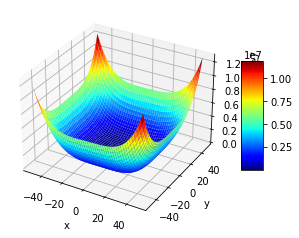

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Criando os valores de x e y para plotar a superfície
X = np.arange(-50, 50, 0.1)
Y = np.arange(-50, 50, 0.1)
X, Y = np.meshgrid(X, Y)
Z = himmelblau(X, Y)

# Plotando a superfície em 3D
surf = ax.plot_surface(X, Y, Z, cmap='jet')

# Adicionando uma barra de cores
fig.colorbar(surf, shrink=0.5, aspect=5)

# Configurando os rótulos dos eixos
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Mostrando o gráfico
plt.show()


## Objetivo



Delete este texto e escreva seu objetivo.

Neste experimento, o nosso objetivo é encontrar através do algoritmo genético, as coordenadas do mínimo global da função de Himmelblau para verificar se o nosso algoritmo genético está funcionando da maneira correta.

## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [2]:
import random

from funcoes_playground import genes_hbl
from funcoes_playground import individuo_hbl as individuo
from funcoes_playground import populacao_chutes_hbl
from funcoes_playground import fitness_hbl
from funcoes_playground import selecao_torneio_min
from funcoes_playground import cruzamento_ponto_simples as funcao_cruzamento
from funcoes_playground import mutacao_cordenada

In [3]:
##### CONSTANTES #####

VALOR_MAX_HBL = 2000
N_GENES = 2
TAMANHO_POP = 100
CHANCE_MUTACAO = 0.05
CHANCE_CRUZAMENTO = 0.5

def equacao (x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

In [4]:
# funções locais

def cria_populacao_inicial(tamanho, tamanho_senha):
    return populacao_chutes_hbl(TAMANHO_POP, N_GENES, VALOR_MAX_HBL)

def funcao_objetivo_pop(populacao):
    return fitness_hbl(populacao, equacao)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_min(populacao, fitness)

def funcao_mutacao(individuo):
    return mutacao_cordenada(individuo, VALOR_MAX_HBL)

## Códigos e discussão



In [5]:
populacao = cria_populacao_inicial(TAMANHO_POP, N_GENES)
melhor_fitness_ja_visto = float("inf")  # é assim que escrevemos infinito em python

print("Progresso da melhor senha já vista:")

#for n in range(NUM_GERACOES):    
while melhor_fitness_ja_visto != 0:
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    #print(fitness)
    populacao = funcao_selecao(populacao, fitness)
    
    #print(populacao)    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    menor_fitness = min(fitness)
    if menor_fitness < melhor_fitness_ja_visto:        
        posicao = fitness.index(menor_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = menor_fitness
        print((melhor_individuo_ja_visto), "- fitness:", melhor_fitness_ja_visto)

print()
print("Melhor palpite para coordenadas encontrado:")
print((melhor_individuo_ja_visto))

Progresso da melhor senha já vista:
[2, 71] - fitness: 25365392
[2, 17] - fitness: 80756
[2, 13] - fitness: 26932
[2, 5] - fitness: 404
[2, 2] - fitness: 26
[3, 2] - fitness: 0

Melhor palpite para coordenadas encontrado:
[3, 2]


### interpetação do print acima
Podemos ver que foram encontradas as coordenadas 3 e 2. ,<dt>.
    Nosso algoritmo começou com chutes relativamente distantes dos pontos mínimos. Conforme o código foi rodando, podemos ver que os valores foram se aproximando das coordenadas esperadas.
    Analsiadno o fitness printados, vemos uma singificativa melhora a cada nova geração.

## Conclusão



Depois de realizar este experimento, consegui compreender um pouco mais sobre a ampla versatilidade de aplicação dos algoritmos genéticos.
Com a aplicação das etapas


## Referências consultadas



1. Github do professor Daniel (https://github.com/drcassar/aula_redes/tree/main)

2. função de himmelblau (https://en.wikipedia.org/wiki/Himmelblau%27s_function)

3. Chat GPT para gerar o gráfico de himmelblau.

## Playground

